# Exploratory Analysis Zillow

This is a recurrence of the results of the conversion from R to Python. [Philipp Spachtholz](https://www.kaggle.com/philippsp/exploratory-analysis-zillow) uses R to complete the analysis, here I uses Python.  

There may be slight differences from the original results, partly because the data is the second edition.  

There are some methods, such as geom_smooth, I have not found a more suitable alternative in Python. And [ggplot for python](https://github.com/yhat/ggpy) has not been updated for 4 years. So for longer-term adaptation, I did not use ggplot for drawing here. (Now there have been some problems, for example, because of the changes in Pandas, from ggplot import *, will report an error. To solve this, the Pandas package needs to be manually modified). When encountering such graphics, I will try to find alternatives. If you know of a better plan, please let me know.

# Read in the data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
train_df.head()

parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02

In [3]:
properties_df = pd.read_csv('properties_2016.csv', low_memory=False)
properties_df.head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  NaN                    NaN   
3          0.0         0.0                  3.0                    7.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid  ...  numberofstories  fireplaceflag  \
0                NaN         NaN  ...              NaN            NaN   
1                NaN         NaN  ...              NaN            NaN   
2                NaN         NaN  ...              NaN            NaN   
3                NaN         NaN  ...              1.0            NaN   
4                NaN         NaN  ...              NaN            NaN   

   structuretaxvaluedollarcnt  taxvaluedollarcnt  assessmentyear  \
0                         NaN                9.0          2015.0   
1                         NaN            27516.0          2015.0   
2                    650756.0          1413387.0          2015.0   
3                    571346.0          1156834.0          2015.0   
4                    193796.0           433491.0          2015.0   

   landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  taxdelinquencyyear  \
0                    9.0        NaN                 NaN                 NaN   
1                27516.0        NaN                 NaN                 NaN   
2               762631.0   20800.37                 NaN                 NaN   
3               585488.0   14557.57                 NaN                 NaN   
4               239695.0    5725.17                 NaN                 NaN   

   censustractandblock  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 58 columns]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
parcelid           90275 non-null int64
logerror           90275 non-null float64
transactiondate    90275 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


In [5]:
properties_df.get_dtype_counts()

float64    52
int64       1
object      5
dtype: int64

## Renaming the features

transactions <- transactions %>% rename(  
  id_parcel = parcelid,  
  date = transactiondate  
)  

properties <- properties %>%    
  mutate(tax_delinquency = ifelse(tax_delinquency=="Y",1,0),  
         flag_fireplace = ifelse(flag_fireplace=="Y",1,0),  
         flag_tub = ifelse(flag_tub=="Y",1,0))

In [6]:
name_dict_res = {
"id_parcel": "parcelid",
"build_year": "yearbuilt",
"area_basement": "basementsqft",
"area_patio": "yardbuildingsqft17",
"area_shed": "yardbuildingsqft26", 
"area_pool": "poolsizesum",  
"area_lot": "lotsizesquarefeet", 
"area_garage": "garagetotalsqft",
"area_firstfloor_finished": "finishedfloor1squarefeet",
"area_total_calc": "calculatedfinishedsquarefeet",
"area_base": "finishedsquarefeet6",
"area_live_finished": "finishedsquarefeet12",
"area_liveperi_finished": "finishedsquarefeet13",
"area_total_finished": "finishedsquarefeet15",  
"area_unknown": "finishedsquarefeet50",
"num_unit": "unitcnt", 
"num_story": "numberofstories",  
"num_room": "roomcnt",
"num_bathroom": "bathroomcnt",
"num_bedroom": "bedroomcnt",
"num_bathroom_calc": "calculatedbathnbr",
"num_bath": "fullbathcnt",  
"num_75_bath": "threequarterbathnbr", 
"num_fireplace": "fireplacecnt",
"num_pool": "poolcnt",  
"num_garage": "garagecarcnt",  
"region_county": "regionidcounty",
"region_city": "regionidcity",
"region_zip": "regionidzip",
"region_neighbor": "regionidneighborhood",  
"tax_total": "taxvaluedollarcnt",
"tax_building": "structuretaxvaluedollarcnt",
"tax_land": "landtaxvaluedollarcnt",
"tax_property": "taxamount",
"tax_year": "assessmentyear",
"tax_delinquency": "taxdelinquencyflag",
"tax_delinquency_year": "taxdelinquencyyear",
"zoning_property": "propertyzoningdesc",
"zoning_landuse": "propertylandusetypeid",
"zoning_landuse_county": "propertycountylandusecode",
"flag_fireplace": "fireplaceflag", 
"flag_tub": "hashottuborspa",
"quality": "buildingqualitytypeid",
"framing": "buildingclasstypeid",
"material": "typeconstructiontypeid",
"deck": "decktypeid",
"story": "storytypeid",
"heating": "heatingorsystemtypeid",
"aircon": "airconditioningtypeid",
"architectural_style": "architecturalstyletypeid"
}

name_dict = {}
for k, v in name_dict_res.items():
    name_dict[v] = k

In [7]:
print(len(name_dict_res))
print(len(name_dict))

50
50


In [8]:
properties_df = properties_df.rename(columns=name_dict)
properties_df.columns

Index(['id_parcel', 'aircon', 'architectural_style', 'area_basement',
       'num_bathroom', 'num_bedroom', 'framing', 'quality',
       'num_bathroom_calc', 'deck', 'area_firstfloor_finished',
       'area_total_calc', 'area_live_finished', 'area_liveperi_finished',
       'area_total_finished', 'area_unknown', 'area_base', 'fips',
       'num_fireplace', 'num_bath', 'num_garage', 'area_garage', 'flag_tub',
       'heating', 'latitude', 'longitude', 'area_lot', 'num_pool', 'area_pool',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'zoning_landuse_county',
       'zoning_landuse', 'zoning_property', 'rawcensustractandblock',
       'region_city', 'region_county', 'region_neighbor', 'region_zip',
       'num_room', 'story', 'num_75_bath', 'material', 'num_unit',
       'area_patio', 'area_shed', 'build_year', 'num_story', 'flag_fireplace',
       'tax_building', 'tax_total', 'tax_year', 'tax_land', 'tax_property',
       'tax_delinquency', 'tax_delinquency_year', 'censustractandb

In [9]:
properties_df['tax_delinquency'].value_counts()

Y    56462
Name: tax_delinquency, dtype: int64

In [10]:
properties_df['tax_delinquency'] = properties_df['tax_delinquency'].apply(lambda x: 1 if x == "Y" else 0)
properties_df['flag_fireplace'] = properties_df['flag_fireplace'].apply(lambda x: 1 if x == "Y" else 0)
properties_df['flag_tub'] = properties_df['flag_tub'].apply(lambda x: 1 if x == "Y" else 0)

# EDA

## Distribution of transaction dates

tmp <- transactions %>% mutate(year_month = make_date(year=year(date),month=month(date)))  
tmp %>%   
  group_by(year_month) %>% count() %>%   
  ggplot(aes(x=year_month,y=n)) +   
  geom_bar(stat="identity", fill="red")+  
  geom_vline(aes(xintercept=as.numeric(as.Date("2016-10-01"))),size=2)

In [11]:
train_df['transaction_year'] = train_df['transactiondate'].dt.year
train_df['transaction_month'] = train_df['transactiondate'].dt.month

month_count_df = train_df[['parcelid', 'transaction_year', 'transaction_month']].groupby(
    ['transaction_year', 'transaction_month']).count()
month_count_df

parcelid
transaction_year transaction_month          
2016             1                      6556
                 2                      6333
                 3                      8652
                 4                      9311
                 5                      9961
                 6                     10922
                 7                      9947
                 8                     10476
                 9                      9575
                 10                     4977
                 11                     1826
                 12                     1739

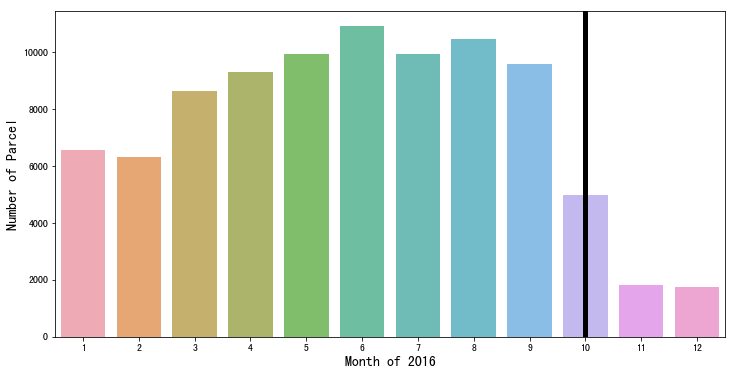

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(month_count_df.index.get_level_values(1), month_count_df.parcelid, alpha=0.8)
plt.axvline(9, 0, 10, color='black', linewidth='5')
plt.xlabel('Month of 2016', fontsize=14)
plt.ylabel('Number of Parcel', fontsize=14)
plt.show()

## Outcome

transactions %>%   
  ggplot(aes(x=logerror)) +   
  geom_histogram(bins=400, fill="red")+  
  theme_bw()+theme(axis.title = element_text(size=16),axis.text = element_text(size=14))+  
  ylab("Count")+coord_cartesian(x=c(-0.5,0.5))

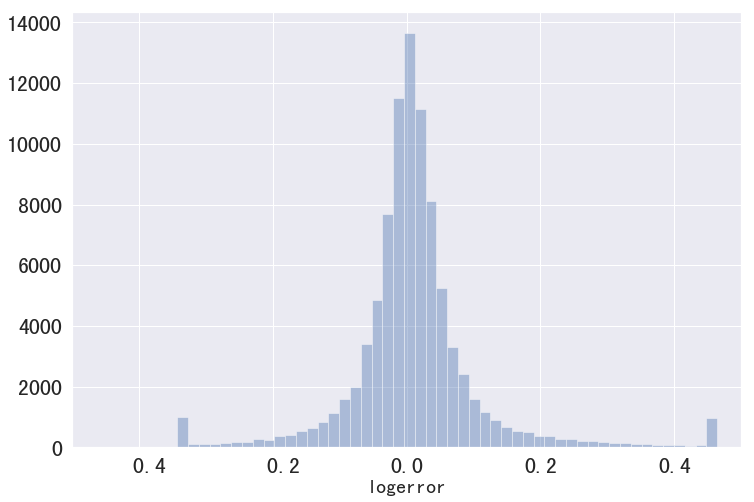

In [14]:
ulimit = np.percentile(train_df.logerror.values, 99)
llimit = np.percentile(train_df.logerror.values, 1)
train_df['logerror'].loc[train_df['logerror']>ulimit] = ulimit
train_df['logerror'].loc[train_df['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
plt.xlim(-0.5, 0.5)
sns.distplot(train_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=20)
# plt.ylabel('Number of Parcel', fontsize=20)
plt.show()

## Absolute logerror

transactions <- transactions %>% mutate(abs_logerror = abs(logerror))  
transactions %>%   
  ggplot(aes(x=abs_logerror)) +    
  geom_histogram(bins=400, fill="red")+  
  theme_bw()+theme(axis.title = element_text(size=16),axis.text = element_text(size=14))+  
  ylab("Count")+coord_cartesian(x=c(0,0.5))

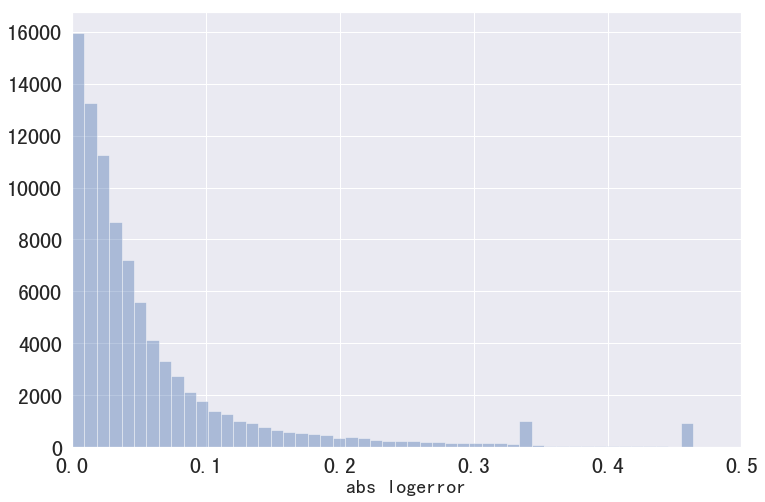

In [15]:
train_df['abs_logerror'] = train_df['logerror'].map(abs)

plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
plt.xlim(0, 0.5)
sns.distplot(train_df.abs_logerror.values, bins=50, kde=False)
plt.xlabel('abs logerror', fontsize=20)
# plt.ylabel('Number of Parcel', fontsize=20)
plt.show()

## How does absolute log error change with time

transactions %>%    
  mutate(year_month = make_date(year=year(date),month=month(date)) ) %>%   
  group_by(year_month) %>% summarize(mean_abs_logerror = mean(abs_logerror)) %>%   
  ggplot(aes(x=year_month,y=mean_abs_logerror)) +   
  geom_line(size=1.5, color="red")+  
  geom_point(size=5, color="red")+theme_bw()

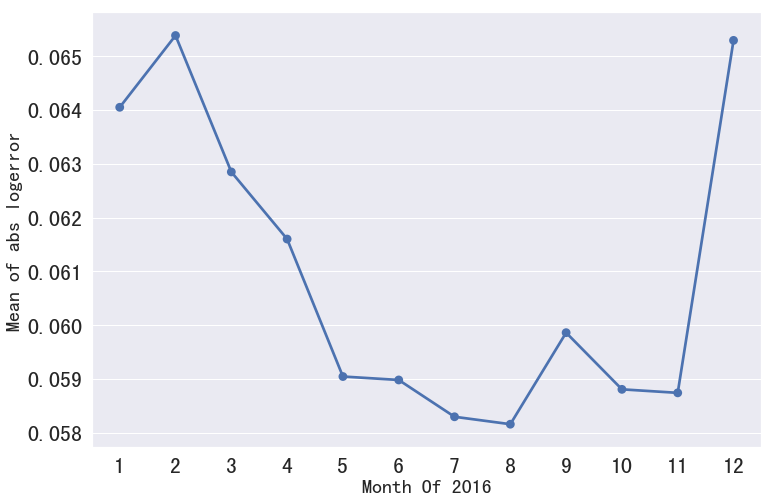

In [16]:
abs_logerror_month = train_df[['transaction_month', 'abs_logerror']].groupby(['transaction_month']).mean()

plt.figure(figsize=(12,8))
sns.pointplot(data=abs_logerror_month, x=abs_logerror_month.index, y='abs_logerror', join=True)
plt.xlabel('Month Of 2016', fontsize=20)
plt.ylabel('Mean of abs logerror', fontsize=20)
plt.show()

## How does log error change with time

transactions %>%   
  mutate(year_month = make_date(year=year(date),month=month(date)) ) %>%   
  group_by(year_month) %>% summarize(mean_logerror = mean(logerror)) %>%   
  ggplot(aes(x=year_month,y=mean_logerror)) +   
  geom_line(size=1.5, color="red")+geom_point(size=5, color="red")+theme_bw()

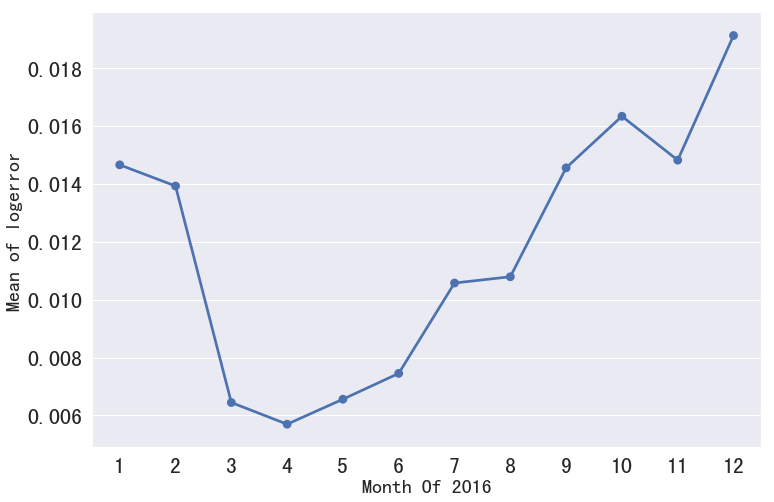

In [17]:
logerror_month = train_df[['transaction_month', 'logerror']].groupby(['transaction_month']).mean()

plt.figure(figsize=(12,8))
sns.pointplot(data=logerror_month, x=logerror_month.index, y='logerror', join=True)
plt.xlabel('Month Of 2016', fontsize=20)
plt.ylabel('Mean of logerror', fontsize=20)
plt.show()

## Missing values

missing_values <- properties %>% summarize_each(funs(sum(is.na(.))/n()))  

missing_values <- gather(missing_values, key="feature", value="missing_pct")  
missing_values %>%   
  ggplot(aes(x=reorder(feature,-missing_pct),y=missing_pct)) +  
  geom_bar(stat="identity",fill="red")+  
  coord_flip()+theme_bw()

In [18]:
missing_values = properties_df.isnull().sum(axis=0).reset_index()
missing_values.columns = ['feature', 'missing_pct']
missing_values['missing_pec'] = missing_values['missing_pct'] / len(properties_df)
missing_values = missing_values.sort_values(by='missing_pct')
missing_values.head()

feature  missing_pct  missing_pec
0         id_parcel            0     0.000000
49   flag_fireplace            0     0.000000
22         flag_tub            0     0.000000
55  tax_delinquency            0     0.000000
25        longitude        11437     0.003831

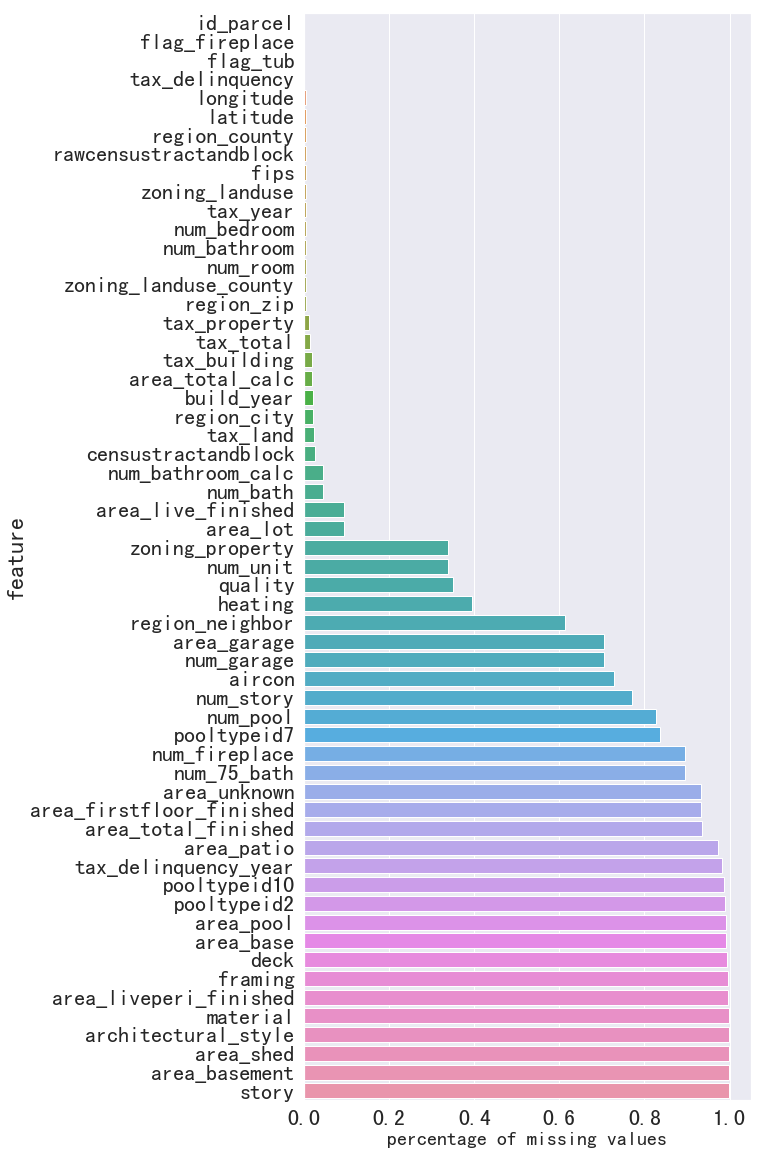

In [19]:
plt.figure(figsize=(8,20))
sns.barplot(data=missing_values, y='feature', x='missing_pec', orient="h")
plt.xlabel('percentage of missing values', fontsize=20)
plt.show()

In [20]:
# good_features <- filter(missing_values, missing_pct<0.75)
good_features = missing_values[missing_values['missing_pec'] < 0.75]
good_features.tail()

feature  missing_pct  missing_pec
23          heating      1178816     0.394885
38  region_neighbor      1828815     0.612624
21      area_garage      2101950     0.704120
20       num_garage      2101950     0.704120
1            aircon      2173698     0.728154

## Correlation with absolute logerror

### num_ features:

vars <- good_features$feature[str_detect(good_features$feature,'num_')]  

cor_tmp <- transactions %>% left_join(properties, by="id_parcel")   
tmp <- cor_tmp %>% select(one_of(c(vars,"abs_logerror")))  

corrplot(cor(tmp, use="complete.obs"),type="lower")  

**Python seems don't have the same method like complete.obs**

In [21]:
cor_tmp = train_df.merge(properties_df, how='left', left_on='parcelid', right_on='id_parcel')
cor_tmp.head()

parcelid  logerror transactiondate  transaction_year  transaction_month  \
0  11016594    0.0276      2016-01-01              2016                  1   
1  14366692   -0.1684      2016-01-01              2016                  1   
2  12098116   -0.0040      2016-01-01              2016                  1   
3  12643413    0.0218      2016-01-02              2016                  1   
4  14432541   -0.0050      2016-01-02              2016                  1   

   abs_logerror  id_parcel  aircon  architectural_style  area_basement  ...  \
0        0.0276   11016594     1.0                  NaN            NaN  ...   
1        0.1684   14366692     NaN                  NaN            NaN  ...   
2        0.0040   12098116     1.0                  NaN            NaN  ...   
3        0.0218   12643413     1.0                  NaN            NaN  ...   
4        0.0050   14432541     NaN                  NaN            NaN  ...   

   num_story  flag_fireplace  tax_building  tax_total  tax_year  tax_land  \
0        NaN               0      122754.0   360170.0    2015.0  237416.0   
1        NaN               0      346458.0   585529.0    2015.0  239071.0   
2        NaN               0       61994.0   119906.0    2015.0   57912.0   
3        NaN               0      171518.0   244880.0    2015.0   73362.0   
4        2.0               0      169574.0   434551.0    2015.0  264977.0   

   tax_property  tax_delinquency  tax_delinquency_year  censustractandblock  
0       6735.88                0                   NaN         6.037107e+13  
1      10153.02                0                   NaN                  NaN  
2      11484.48                0                   NaN         6.037464e+13  
3       3048.74                0                   NaN         6.037296e+13  
4       5488.96                0                   NaN         6.059042e+13  

[5 rows x 64 columns]

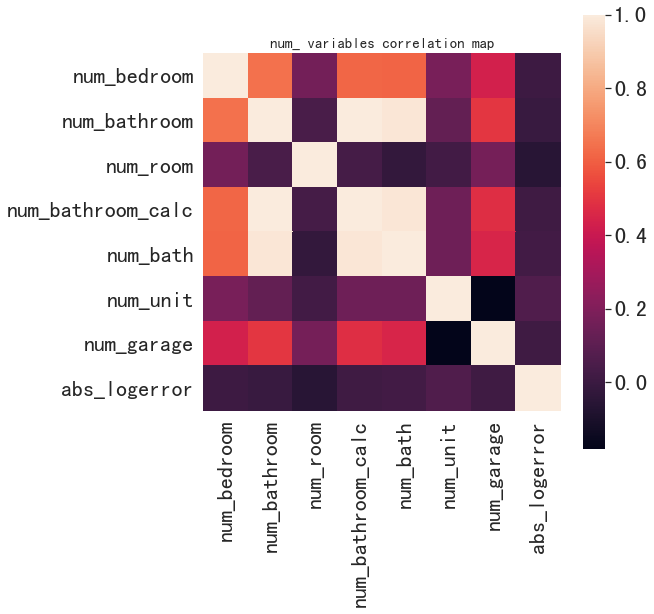

In [22]:
tep_features = good_features[good_features['feature'].str.contains('^num_', regex=True)]['feature'].to_list() + ['abs_logerror']
tmp = cor_tmp[tep_features]
corrmat = tmp.corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, vmax=1., square=True)
plt.title("num_ variables correlation map", fontsize=15)
plt.show()

### area_ features

vars <- good_features$feature[str_detect(good_features$feature,'area_')]  

tmp <- cor_tmp %>% select(one_of(c(vars,"abs_logerror")))  

corrplot(cor(tmp, use="complete.obs"), type="lower")

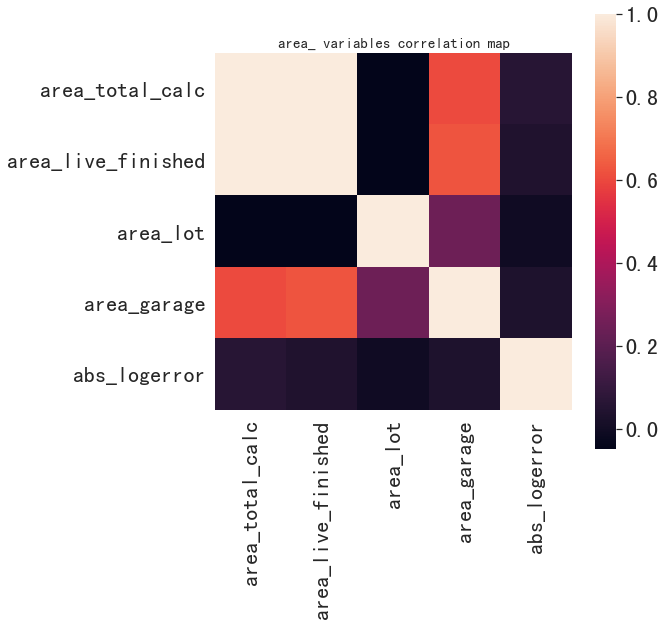

In [23]:
tep_features = good_features[good_features['feature'].str.contains('^area_', regex=True)]['feature'].to_list() + ['abs_logerror']
tmp = cor_tmp[tep_features]
corrmat = tmp.corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, vmax=1., square=True)
plt.title("area_ variables correlation map", fontsize=15)
plt.show()

### tax_ features

vars <- setdiff(good_features$feature[str_detect(good_features$feature,'tax_')],c("tax_delinquency","tax_year"))  

tmp <- cor_tmp %>% select(one_of(c(vars,"abs_logerror")))  

corrplot(cor(tmp, use="complete.obs"), type="lower")  

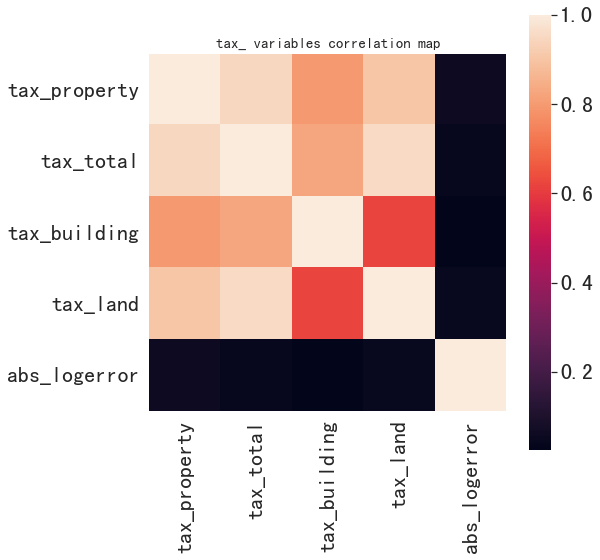

In [24]:
temp_features = good_features[good_features['feature'].str.contains('^tax_', regex=True)]['feature'].to_list() + ['abs_logerror']
need_remove = ['tax_delinquency', 'tax_year']
tep_features = filter(lambda v: v not in need_remove, temp_features)

tmp = cor_tmp[tep_features]
corrmat = tmp.corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, vmax=1., square=True)
plt.title("tax_ variables correlation map", fontsize=15)
plt.show()

## Correlation with logerror

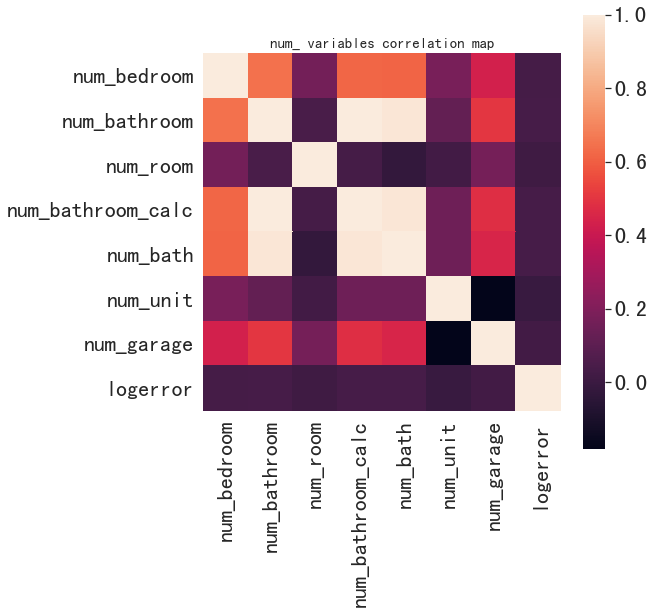

In [25]:
tep_features = good_features[good_features['feature'].str.contains('^num_', regex=True)]['feature'].to_list() + ['logerror']
tmp = cor_tmp[tep_features]
corrmat = tmp.corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, vmax=1., square=True)
plt.title("num_ variables correlation map", fontsize=15)
plt.show()

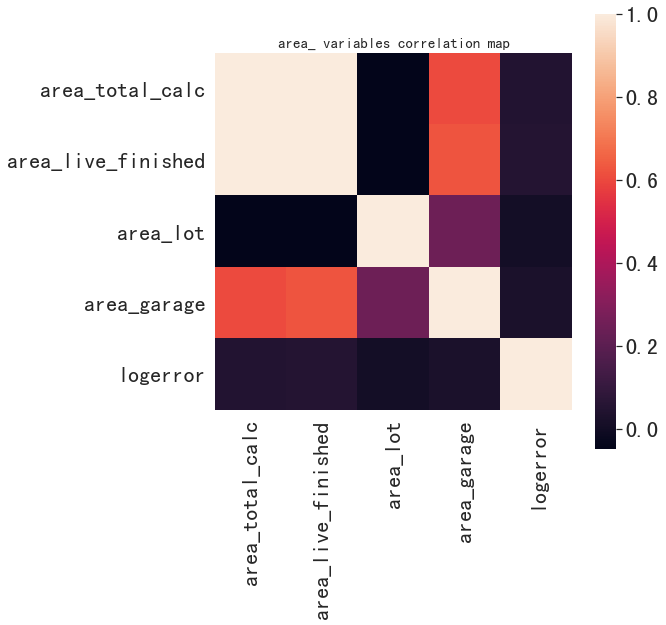

In [26]:
tep_features = good_features[good_features['feature'].str.contains('^area_', regex=True)]['feature'].to_list() + ['logerror']
tmp = cor_tmp[tep_features]
corrmat = tmp.corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, vmax=1., square=True)
plt.title("area_ variables correlation map", fontsize=15)
plt.show()

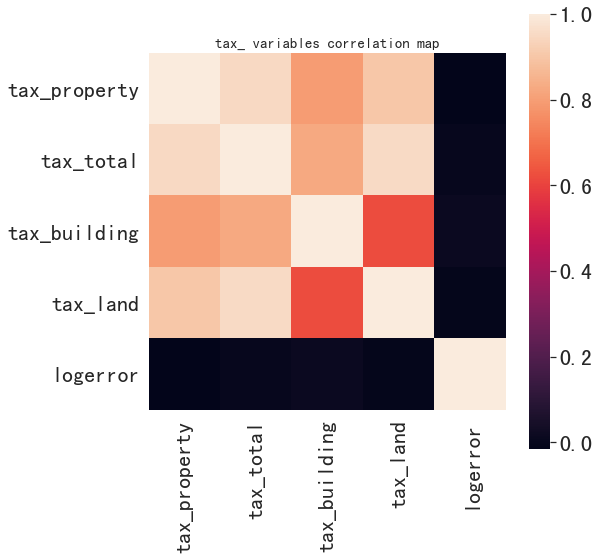

In [27]:
temp_features = good_features[good_features['feature'].str.contains('^tax_', regex=True)]['feature'].to_list() + ['logerror']
need_remove = ['tax_delinquency', 'tax_year']
tep_features = filter(lambda v: v not in need_remove, temp_features)

tmp = cor_tmp[tep_features]
corrmat = tmp.corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, vmax=1., square=True)
plt.title("tax_ variables correlation map", fontsize=15)
plt.show()

## When were the houses built?

cor_tmp %>%   
  ggplot(aes(x=build_year))+geom_line(stat="density", color="red", size=1.2)+theme_bw()

In [28]:
year_count = properties_df.groupby(['build_year'])['id_parcel'].count().to_frame().reset_index()
year_count['kde'] = year_count['id_parcel'] / year_count.id_parcel.sum()
year_count.head()

build_year  id_parcel           kde
0      1801.0          3  1.025540e-06
1      1805.0          1  3.418466e-07
2      1806.0          2  6.836931e-07
3      1807.0          1  3.418466e-07
4      1808.0          2  6.836931e-07

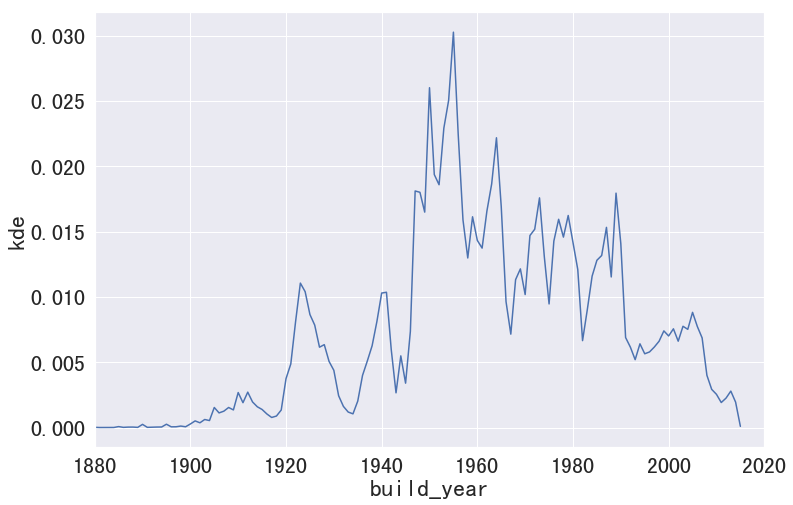

In [29]:
plt.figure(figsize=(12,8))
sns.lineplot(x="build_year", y="kde", data=year_count).set(xlim=(1880,2020))
plt.show()

## How does the absolute logerror change with build_year?

cor_tmp %>%   
  group_by(build_year) %>%   
  summarize(mean_abs_logerror = mean(abs(logerror)),n()) %>%   
  ggplot(aes(x=build_year,y=mean_abs_logerror))+  
  geom_smooth(color="grey40")+  
  geom_point(color="red")+coord_cartesian(ylim=c(0,0.25))+theme_bw()

Since the Python don't have geom_smooth and I didn't find something changeable. If you know, please kindly tell me. Thanks. So, I will just plot something similar at here.

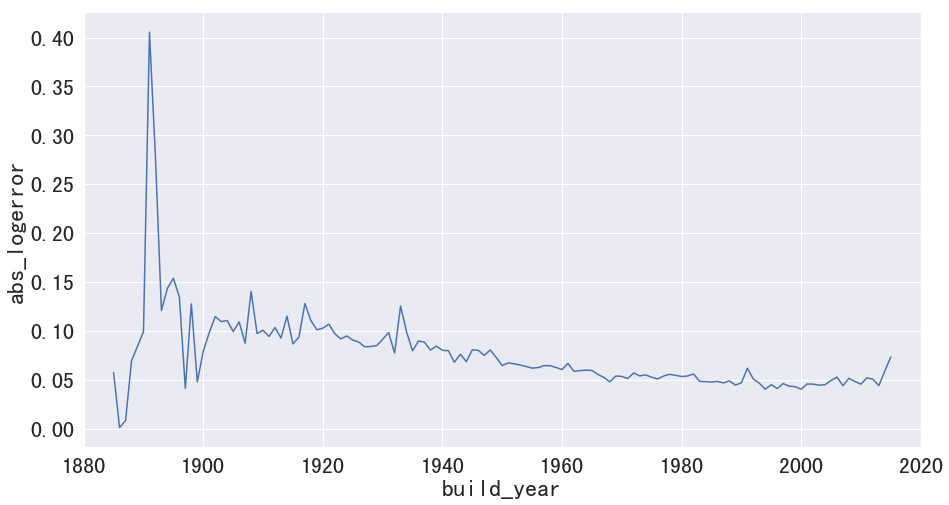

In [30]:
year_abs_logerror_mean = cor_tmp.groupby(['build_year'])['abs_logerror'].mean().to_frame().reset_index()

plt.figure(figsize=(15,8))
sns.lineplot(x="build_year", y="abs_logerror", data=year_abs_logerror_mean).set(xlim=(1880,2020))
plt.show()

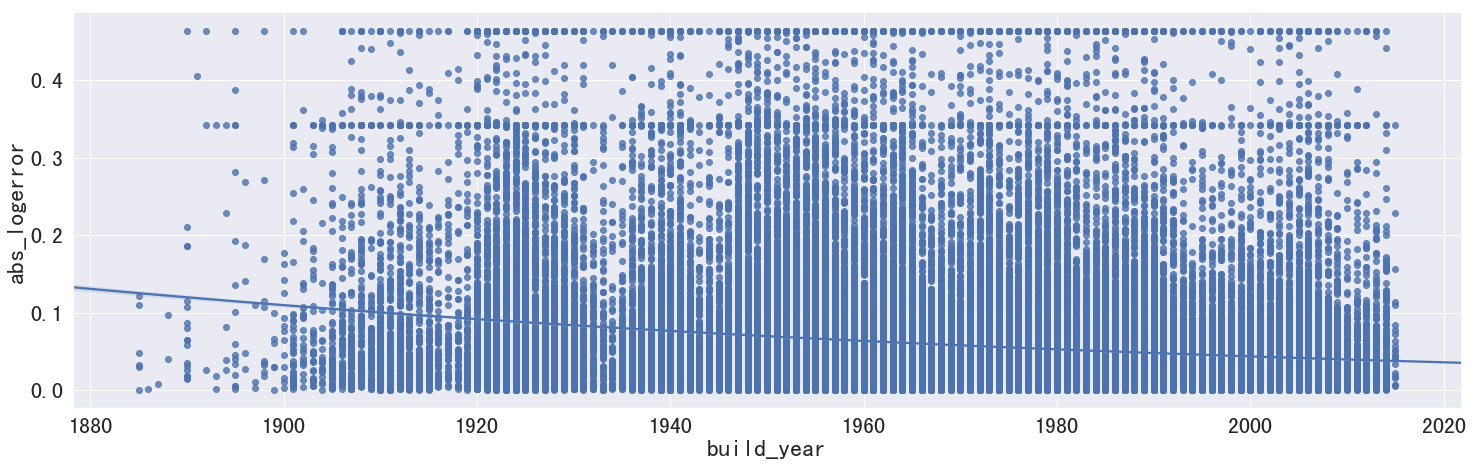

In [31]:
sns.lmplot(x="build_year", y="abs_logerror", data=cor_tmp, logistic=True, height=7, aspect=3)
plt.show()

## How does the logerror change with build_year?

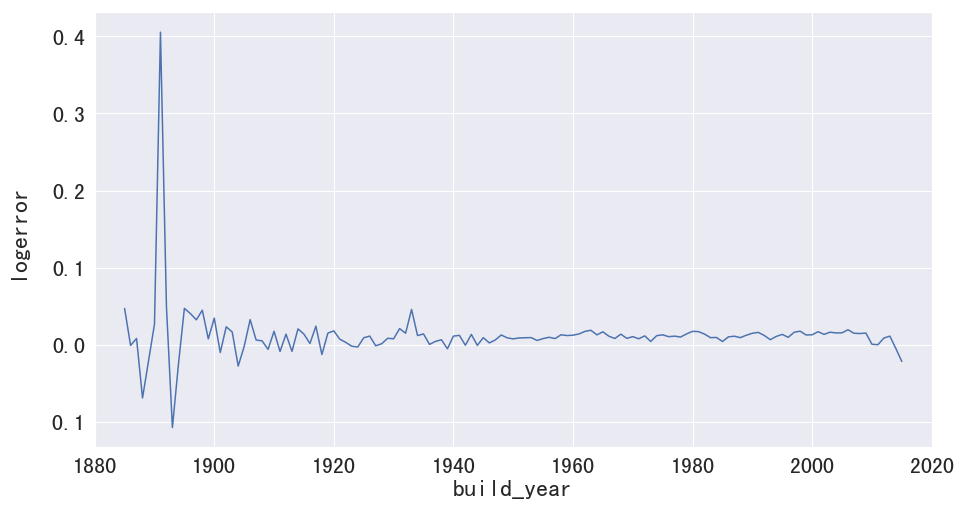

In [32]:
year_logerror_mean = cor_tmp.groupby(['build_year'])['logerror'].mean().to_frame().reset_index()

plt.figure(figsize=(15,8))
sns.lineplot(x="build_year", y="logerror", data=year_logerror_mean).set(xlim=(1880,2020))
plt.show()

<Figure size 1080x576 with 0 Axes>

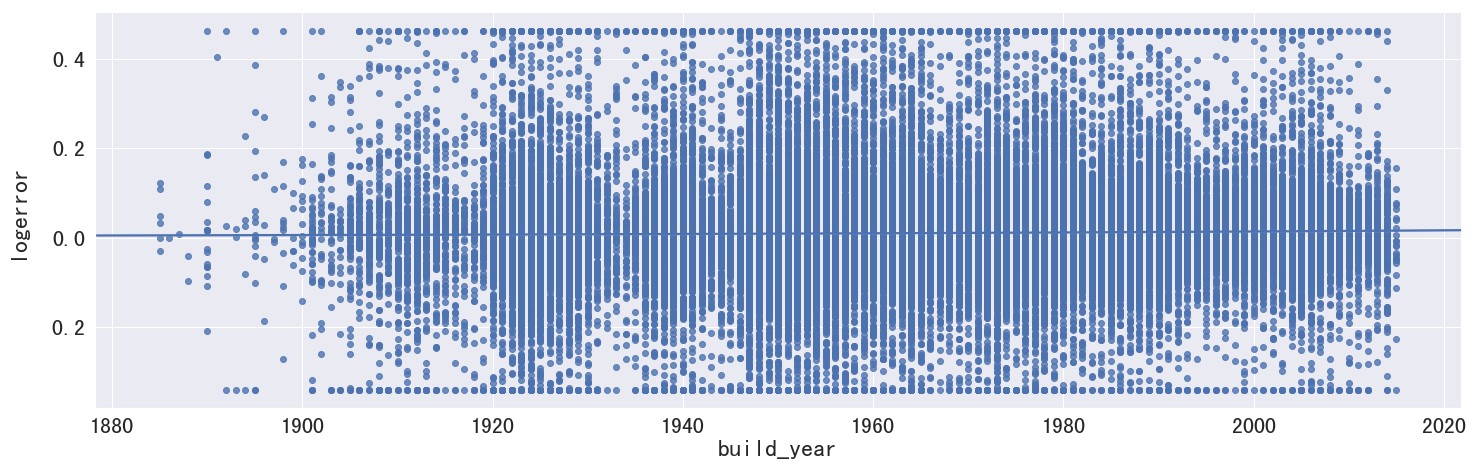

In [33]:
plt.figure(figsize=(15,8))
sns.lmplot(x="build_year", y="logerror", data=cor_tmp, logistic=True, height=7, aspect=3)
plt.show()

Here, we use Python to show the results, but we can't fully show the results that R drawing can show.
![](logerror.png)
![](abs_logerror.png)
As shown in the figure, R shows the volatility of the two errors with the year, but the Python alternative result failed to show. Need to draw other graphics.

## Where does Zestimate predict well?

transactions <- transactions %>% mutate(percentile = cut(abs_logerror,quantile(abs_logerror, probs=c(0, 0.1, 0.25, 0.75, 0.9, 1),names = FALSE),include.lowest = TRUE,labels=FALSE))  
  
tmp1 <- transactions %>%   
  filter(percentile == 1) %>%  
  sample_n(5000) %>%  
  left_join(properties, by="id_parcel") 
tmp2 <- transactions %>%  
  filter(percentile == 5) %>%  
  sample_n(5000) %>%  
  left_join(properties, by="id_parcel") 
tmp3 <- transactions %>%  
  filter(percentile == 3) %>%  
  sample_n(5000) %>%  
  left_join(properties, by="id_parcel") 

tmp1 <- tmp1 %>% mutate(type="best_fit")  
tmp2 <- tmp2 %>% mutate(type="worst_fit")  
tmp3 <- tmp3 %>% mutate(type="typical_fit")  


tmp <- bind_rows(tmp1,tmp2,tmp3)  
tmp <- tmp %>% mutate(type = factor(type,levels = c("worst_fit", "typical_fit", "best_fit")))

In [34]:
ulimit = np.percentile(train_df.abs_logerror.values, 90)
llimit = np.percentile(train_df.abs_logerror.values, 10)
mid_up = np.percentile(train_df.abs_logerror.values, 75)
mid_lo = np.percentile(train_df.abs_logerror.values, 25)

In [35]:
tmp1 = cor_tmp.loc[cor_tmp['abs_logerror'] < llimit]
tmp2 = cor_tmp.loc[cor_tmp['abs_logerror'] > ulimit]
tmp3 = cor_tmp.loc[(cor_tmp['abs_logerror'] > mid_lo) & (cor_tmp['abs_logerror'] < mid_up)]

In [36]:
var = 'latitude'

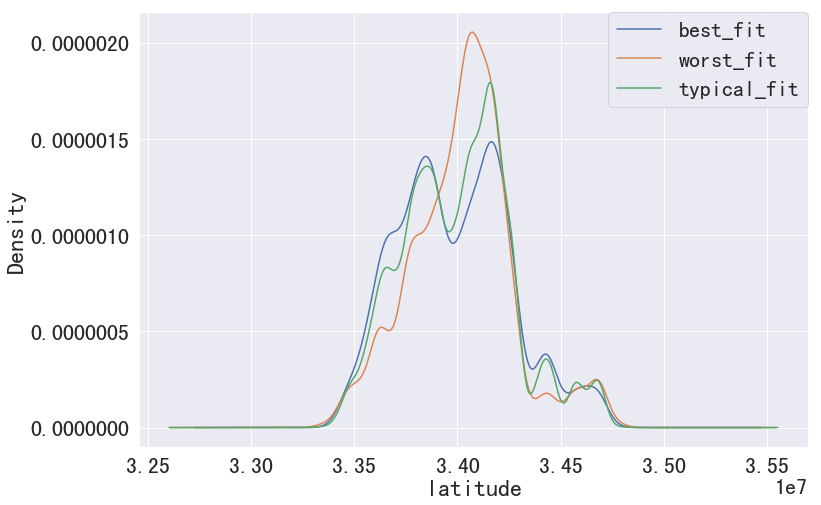

In [37]:
plt.figure(figsize=(12,8))
    
plt.xlabel(var)

"""set min and max value for axes"""
# ax.set_xlim([3.30,3.50])
 
tmp1[var].plot(kind='density', label = 'best_fit')
tmp2[var].plot(kind='density', label = 'worst_fit')
tmp3[var].plot(kind='density', label = 'typical_fit')
 
"""open the grid"""
plt.grid(True)
 
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
 
plt.show()

All of the below methods are not good fit for the original plot. So, I will just skip this. Some plots use the same method with the last sell, I will also skip them.

In [38]:
# temp_mean = cor_tmp.groupby([var])['abs_logerror'].mean().to_frame().reset_index()

# plt.figure(figsize=(15,8))
# sns.lineplot(x=var, y="abs_logerror", data=temp_mean)
# plt.show()

# sns.jointplot(x=var, y="abs_logerror", data=temp_mean, kind="reg")

# sns.jointplot(x=var, y="abs_logerror", data=temp_mean, kind="kde")

## Where are all those properties?

**kmeans idea comes from:** [Kueipo H.](https://www.kaggle.com/kueipo/simple-eda-geo-data-time-series)

In [40]:
geo_df = cor_tmp[['latitude', 'longitude','logerror']]

In [41]:
geo_df['longitude'] = geo_df['longitude'].div(1e6) 
geo_df['latitude'] = geo_df['latitude'].div(1e6)

In [42]:
geo_df.dropna(subset=['latitude','longitude'], axis=0 ,inplace=True)

In [43]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=120, batch_size=1000).fit(geo_df[['latitude','longitude']])
geo_df.loc[:, 'label'] = kmeans.labels_

In [44]:
map_2 = folium.Map(location=[34.088537, -118.249923], zoom_start=9)
map_1 = folium.Map(location=[34.088537, -118.249923], zoom_start=9,
                   tiles='Stamen Terrain')

for label in kmeans.cluster_centers_:
    folium.Marker(location=[label][0]).add_to(map_2)
    folium.Marker(location=[label][0]).add_to(map_1)

map_1

In [45]:
map_2

In [46]:
hm_wide = HeatMap(
    list(zip(geo_df.latitude.values, geo_df.longitude.values, geo_df.logerror.values)),
    min_opacity=0.2,
    radius=17, 
    blur=15, 
    max_zoom=1,
)

In [47]:
map_3 = folium.Map(location=[34.088537, -118.249923], zoom_start=9)
map_3.add_child(hm_wide)

# Simple Conclusion

Because this is just a reproduction of the code and no analysis is done, the conclusion does not involve the content of the analysis.

Through this exercise, I found that although most of the drawing part can be done both in Python and R, there are still some drawing results that are temporarily unable to find a very suitable replacement.
In addition, the difference between the drawing results of Python and R will bring some differences in the analysis results. For example, the above mentioned in the "How does the logerror change with build_year?" section.
Both language are powerful tools, but to be proficient in application, a lot of practice is required.